## Limpieza

In [30]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [37]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [102]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de coordenadas y mapas (opcional para visualizaciones geográficas)
import geopandas as gpd
import folium

# Manejo del tiempo (por si se requieren análisis temporales)
import time

# Configuración de gráficos
sns.set_theme(style="whitegrid")

# Configuración para que las gráficas aparezcan inline en Jupyter Notebook
%matplotlib inline

In [40]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas del dataset:")
display(df.head())

Dimensiones del dataset: (107743, 15)

Primeras filas del dataset:


,ANO,MES,CODIGO_RNT,COD_MUN,COD_DPTO,ESTADO_RNT,RAZON_SOCIAL,DEPARTAMENTO,MUNICIPIO,CATEGORIA,SUB_CATEGORIA,HABITACIONES,CAMAS,NUM_EMP,CORREO
0,2024,3,11,11001,11,activo,bcd travel oficina principal,bogota,bogota d.c.,agencias de viajes,agencia de viajes y de turismo,0,0.0,115,carlos.vernaza@bcdtravel.com.co
1,2024,3,56,11001,11,activo,revel representaciones turisticas,bogota,bogota d.c.,oficinas de representacion turística,oficina de representacion turística,0,0.0,0,revellimitada@outlook.com
2,2024,3,61,13001,13,activo,aviatur cartagena,bolivar,cartagena,agencias de viajes,agencia de viajes y de turismo,0,0.0,34,a_porras@aviatur.com
3,2024,3,68,76001,76,activo,aviatur cali la flora,valle del cauca,cali,agencias de viajes,agencia de viajes y de turismo,0,0.0,58,nacosta@aviatur.com.co
4,2024,3,79,8001,8,activo,aviatur barranquilla,atlantico,barranquilla,agencias de viajes,agencia de viajes y de turismo,0,0.0,17,elizabethmorales@aviatur.com


In [42]:
# Resumen de las columnas y sus tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107743 entries, 0 to 107828
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ANO            107743 non-null  int64  
 1   MES            107743 non-null  int64  
 2   CODIGO_RNT     107743 non-null  int64  
 3   COD_MUN        107743 non-null  int64  
 4   COD_DPTO       107743 non-null  int64  
 5   ESTADO_RNT     107743 non-null  object 
 6   RAZON_SOCIAL   107743 non-null  object 
 7   DEPARTAMENTO   107743 non-null  object 
 8   MUNICIPIO      107743 non-null  object 
 9   CATEGORIA      107743 non-null  object 
 10  SUB_CATEGORIA  107743 non-null  object 
 11  HABITACIONES   107743 non-null  object 
 12  CAMAS          107743 non-null  float64
 13  NUM_EMP        107743 non-null  int64  
 14  CORREO         107743 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 13.2+ MB


In [43]:
# Descripción estadística de las columnas numéricas
display(df.describe())

,ANO,MES,CODIGO_RNT,COD_MUN,COD_DPTO,CAMAS,NUM_EMP
count,107743.0,107743.000000,107743.000000,107743.000000,107743.000000,1.077430e+05,1.077430e+05
mean,2024.0,3.130310,139716.190370,32775.579342,32.592122,2.110855e+10,2.024435e+02
std,0.0,1.915907,61072.641366,27378.502750,27.361799,6.712132e+12,5.631902e+04
min,2024.0,1.000000,11.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,2024.0,2.000000,93726.500000,11001.000000,11.000000,1.000000e+00,0.000000e+00
50%,2024.0,3.000000,151448.000000,18001.000000,18.000000,4.000000e+00,0.000000e+00
75%,2024.0,4.000000,194198.500000,63001.000000,63.000000,1.000000e+01,1.000000e+00
max,2024.0,10.000000,222935.000000,99773.000000,99.000000,2.202020e+15,1.845298e+07


In [12]:
df = pd.read_csv('data.csv', dtype={'HABITACIONES': str}, encoding='latin-1')

In [44]:
# Renombrar columnas
df = df.rename(columns={
    'RAZON_SOCIAL_ESTABLECIMIENTO': 'RAZON_SOCIAL',
    'CORREO_ESTABLECIMIENTO': 'CORREO'
})

In [19]:
print(len(df))

107829


In [23]:
df['HABITACIONES'] = df['HABITACIONES'].str.strip()

In [24]:
print(df.isnull().sum())

ANO               0
MES               0
CODIGO_RNT        0
COD_MUN           0
COD_DPTO          0
ESTADO_RNT        0
RAZON_SOCIAL     10
DEPARTAMENTO      0
MUNICIPIO         0
CATEGORIA         0
SUB_CATEGORIA     0
HABITACIONES     30
CAMAS            29
NUM_EMP           0
CORREO           43
dtype: int64


In [25]:
# Proceso de limpieza
def limpiar_dataframe(df):
    # Eliminar duplicados
    df = df.drop_duplicates()
    
    # Manejar valores nulos
    df = df.dropna()
    
    # Limpiar columnas de texto
    columnas_texto = df.select_dtypes(include=['object']).columns
    for col in columnas_texto:
        df[col] = df[col].str.strip().str.lower()
    
    return df

# Aplicar limpieza
df = limpiar_dataframe(df)

In [26]:
print(len(df))

107743


In [27]:
print(df.isnull().sum())

ANO              0
MES              0
CODIGO_RNT       0
COD_MUN          0
COD_DPTO         0
ESTADO_RNT       0
RAZON_SOCIAL     0
DEPARTAMENTO     0
MUNICIPIO        0
CATEGORIA        0
SUB_CATEGORIA    0
HABITACIONES     0
CAMAS            0
NUM_EMP          0
CORREO           0
dtype: int64


In [28]:
for columna, tipo in df.dtypes.items():
    print(f"{columna}: {tipo}")

ANO: int64
MES: int64
CODIGO_RNT: int64
COD_MUN: int64
COD_DPTO: int64
ESTADO_RNT: object
RAZON_SOCIAL: object
DEPARTAMENTO: object
MUNICIPIO: object
CATEGORIA: object
SUB_CATEGORIA: object
HABITACIONES: object
CAMAS: float64
NUM_EMP: int64
CORREO: object


## Análisis exploratorio

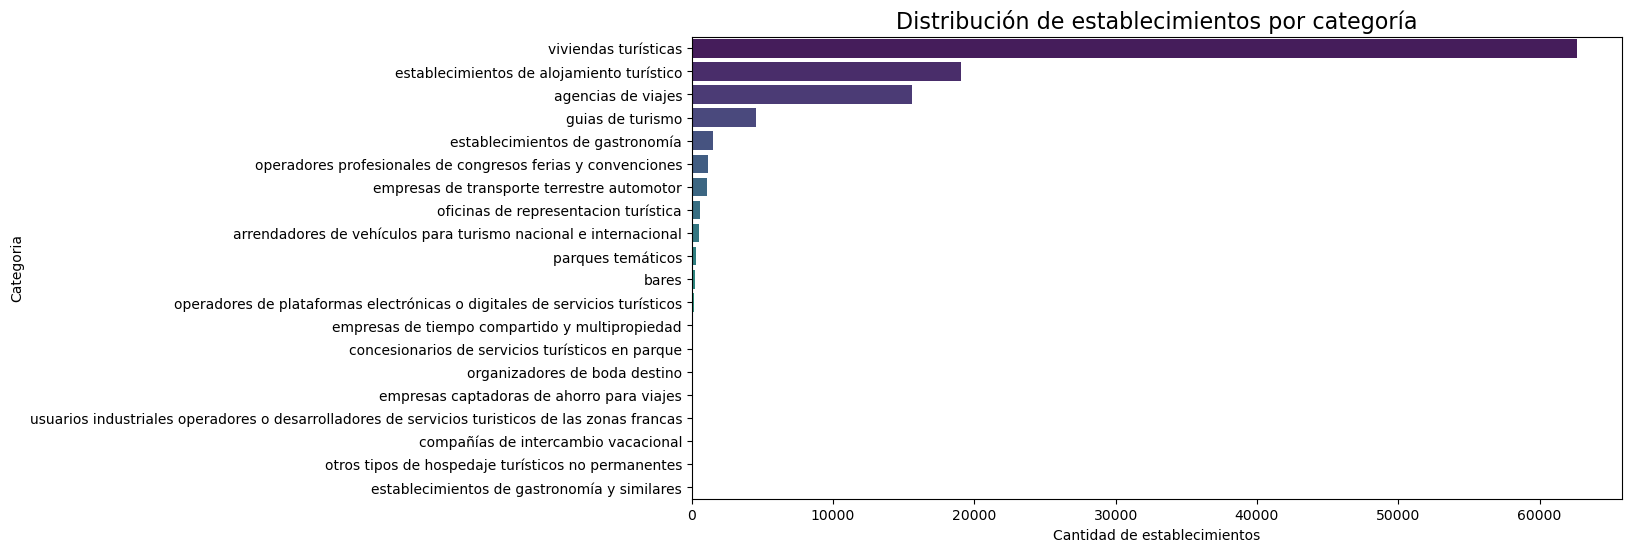

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(y='CATEGORIA', data=df, order=df['CATEGORIA'].value_counts().index, palette='viridis')
plt.title('Distribución de establecimientos por categoría', fontsize=16)
plt.xlabel('Cantidad de establecimientos')
plt.ylabel('Categoria')
plt.show()

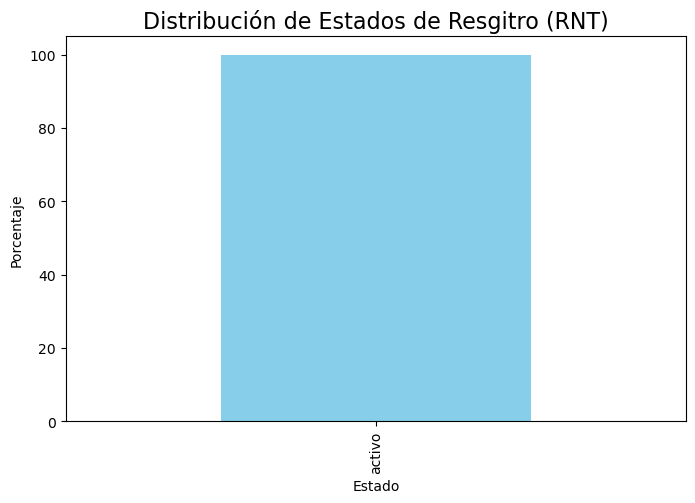

In [49]:
estado_counts = df['ESTADO_RNT'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
estado_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Estados de Resgitro (RNT)', fontsize=16)
plt.ylabel('Porcentaje')
plt.xlabel('Estado')
plt.show()

## Análisis geográfico

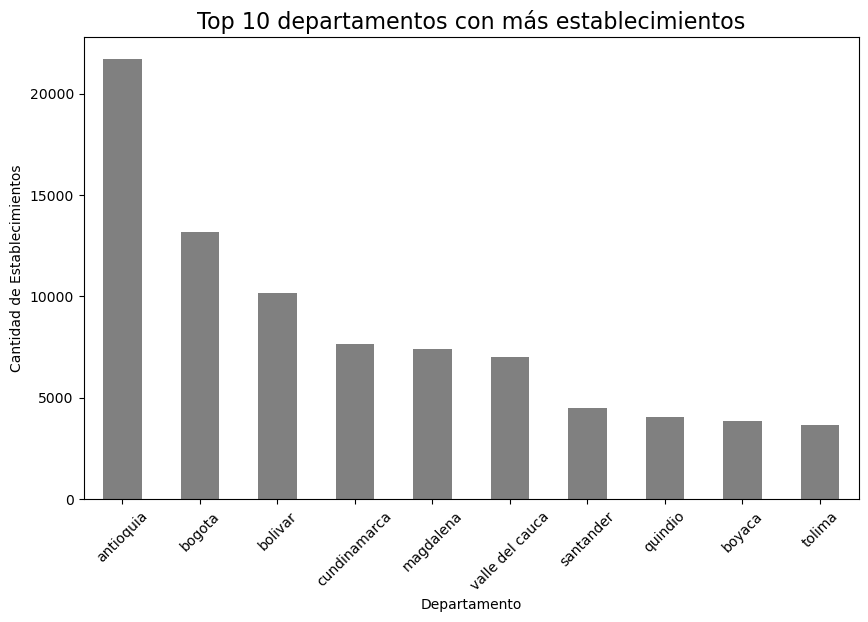

In [58]:
# Top 10 departamentos con más estableciminetos registrados
top = df['DEPARTAMENTO'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top.plot(kind='bar', color='gray')
plt.title('Top 10 departamentos con más establecimientos', fontsize=16)
plt.ylabel('Cantidad de Establecimientos')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.show()

## Relaciones y tendencias

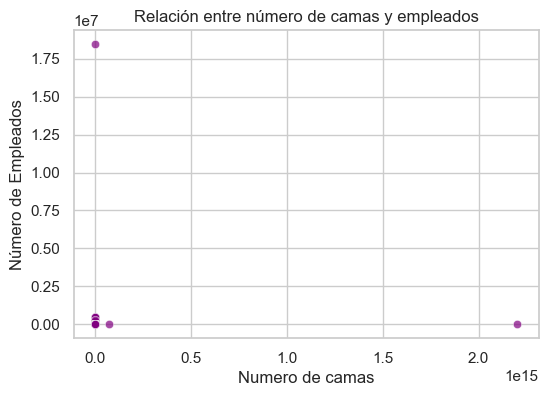

In [110]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='CAMAS', y='NUM_EMP', data=df, alpha=0.7, color='purple')
plt.title('Relación entre número de camas y empleados')
plt.xlabel('Numero de camas')
plt.ylabel('Número de Empleados')
plt.show()

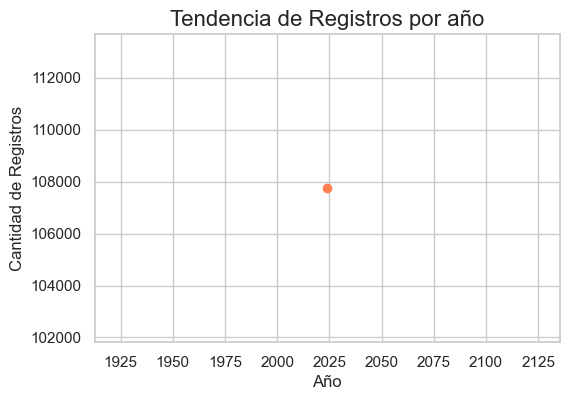

In [109]:
registros = df.groupby('ANO').size()

plt.figure(figsize=(6,4))
registros.plot(kind='line', marker='o', color='coral')
plt.title('Tendencia de Registros por año', fontsize=16)
plt.ylabel('Cantidad de Registros')
plt.xlabel('Año')
plt.grid(True)
plt.show()

# Visualización Avanzada
Para las visualizaciones avanzadas, usaremos gráficos interactivos y análisis más profundos que incluyan mapas y visualizaciones multivariadas.

### 1. Mapa interactivo de establecimientos por municipio

In [92]:
import geopandas as gpd
import pandas as pd
colombia_shapefile = gpd.read_file('C:\DataSets\MGN2023_DPTO_POLITICO\MGN_ADM_DPTO_POLITICO.shp')

In [93]:
print(colombia_shapefile.head())

  dpto_ccdgo    dpto_cnmbr  dpto_ano_c                     dpto_act_a  \
0         05     ANTIOQUIA        1886  Constitucion Politica de 1886   
1         08     ATLÁNTICO        1910                 Ley 21 de 1910   
2         11  BOGOTÁ, D.C.        1538  Constitucion Politica de 1886   
3         13       BOLÍVAR        1886  Constitucion Politica de 1886   
4         15        BOYACÁ        1886  Constitucion Politica de 1886   

     dpto_narea  dpto_nano  shape_Leng  shape_Area  \
0  62807.004377       2023   21.492797    5.135103   
1   3314.458393       2023    2.571601    0.273823   
2   1622.852980       2023    3.765371    0.132208   
3  26720.328604       2023   16.273430    2.195669   
4  23137.997637       2023   15.906767    1.888387   

                                            geometry  
0  POLYGON ((-76.41355 8.87383, -76.40465 8.85195...  
1  POLYGON ((-74.84946 11.09778, -74.84938 11.097...  
2  POLYGON ((-74.07059 4.82856, -74.07036 4.82856...  
3  MULTIPOLYGON 

In [95]:
for columna, tipo in colombia_shapefile.dtypes.items():
    print(f"{columna}: {tipo}")

dpto_ccdgo: object
dpto_cnmbr: object
dpto_ano_c: int32
dpto_act_a: object
dpto_narea: float64
dpto_nano: int32
shape_Leng: float64
shape_Area: float64
geometry: geometry


In [98]:
print(gdf_departamentos.columns)

Index(['dpto_ccdgo', 'dpto_cnmbr', 'dpto_ano_c', 'dpto_act_a', 'dpto_narea',
       'dpto_nano', 'shape_Leng', 'shape_Area', 'geometry', 'DEPARTAMENTO',
       'REGISTROS'],
      dtype='object')


<Figure size 1500x1000 with 0 Axes>

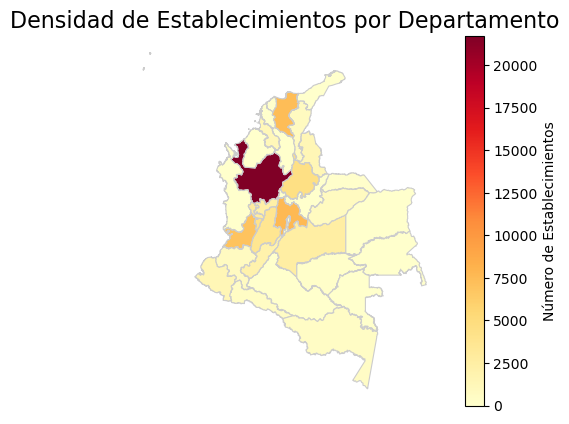

In [99]:
# Validación y preprocesamiento de datos
def prepare_establishment_map(df, colombia_shapefile):
    # Validate input data
    required_columns = ['DEPARTAMENTO', 'COD_DPTO']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Contar establecimientos por departamentos
    conteo_departamentos = df.groupby('DEPARTAMENTO')['CODIGO_RNT'].count().reset_index()
    conteo_departamentos.columns = ['DEPARTAMENTO', 'CANTIDAD']
    
    # Load shapefile
    try:
        gdf_departamentos = gpd.read_file(colombia_shapefile)
    except Exception as e:
        raise IOError(f"Error loading shapefile: {e}")
    
    # Nos aseguramos que los nombres de los departamentos sean coherentes (preprocesamiento opcional)
    conteo_departamentos['DEPARTAMENTO'] = conteo_departamentos['DEPARTAMENTO'].str.upper().str.strip()
    gdf_departamentos['dpto_cnmbr'] = gdf_departamentos['dpto_cnmbr'].str.upper().str.strip()
    
    # Fusionar con una combinación
    gdf_departamentos = gdf_departamentos.merge(
        conteo_departamentos, 
        how='left', 
        left_on='dpto_cnmbr', 
        right_on='DEPARTAMENTO'
    )
    
    # Completar los valores faltantes y asegurar de que sean de tipo numérico
    gdf_departamentos['CANTIDAD'] = gdf_departamentos['CANTIDAD'].fillna(0).astype(int)
    
    return gdf_departamentos

# Función de visualización
def plot_establishment_density(gdf_departamentos):
    plt.figure(figsize=(15, 10))
    ax = gdf_departamentos.plot(
        column='CANTIDAD', 
        cmap='YlOrRd', 
        legend=True,
        edgecolor='0.8',
        linewidth=0.8,
        legend_kwds={'label': 'Número de Establecimientos'},
        missing_kwds={'color': 'lightgrey'}
    )
    
    plt.title('Densidad de Establecimientos por Departamento', fontsize=16)
    plt.axis('off')
    return ax

# Ejecución principal
try:
    # Preparación del mapa de datos
    gdf_mapa = prepare_establishment_map(df, colombia_shapefile)
    
    # Crear un display map
    plot_establishment_density(gdf_mapa)
    plt.show()
except Exception as e:
    print(f"Error en la generación del mapa: {e}")